# Explanation

**Summary:**

novel-py-calculator is a simple Python script that calculates the value of pi to a given number of digits by simulating collisions within a system of two masses and a wall. This "algorithm" is based off of the Youtube video by 3Blue1Brown, *The most unexpected answer to a counting puzzle*, which can be found <a href="https://www.youtube.com/watch?v=HEfHFsfGXjs" target="_blank">here</a>.




**The Algorithm:**

![Free-Body Diagram](https://i.imgur.com/xX7bNEq.png)

Above is a diagram of what the script is simulating. The simulation consists of two masses, $m_1$ and $m_2$, situated on a frictionless surface, and an immovable wall to the left of the two masses. While the mass of $m_1$ is arbritrary, $m_2$'s mass is relative to $m_1$ and varies depending on the digits of pi that the script is to calculate. For a given number of digits of pi required $n$, the mass of $m_2$ is $m_1 * 10^{2n-1}$. For example, if $m_1$ is of mass 1, the simulation to calculate 3 digits of pi would require the mass of $m_2$ to be $10^5$. The velocity, $v_2$, of mass $m_2$ is arbritrary. 

Upon running of the simulation, $m_2$ collides into $m_1$ at velocity $v_1$ in a perfectly elastic collision and sets the system in motion. From this, the two masses continute to collide with each other in perfectly elastic collisions. $m_1$ bounces off of the wall whenever the mass collides with it, completely reversing its velocity. Upon each collision a counter is incremented, which is later used to return the result. This simulation continues on until the system reaches a state in which all objects are no longer able to collide with each other due to their velocities.

The formulae used in calculating the resulting velocities from the elastic collisions in the simulation are as follows:

${\displaystyle {\begin{array}{ccc}v_{1}&=&\displaystyle {\frac {m_{1}-m_{2}}{m_{1}+m_{2}}}u_{1}+{\frac {2m_{2}}{m_{1}+m_{2}}}u_{2}\\[.5em]v_{2}&=&\displaystyle {\frac {2m_{1}}{m_{1}+m_{2}}}u_{1}+{\frac {m_{2}-m_{1}}{m_{1}+m_{2}}}u_{2}\end{array}}}$

Where $u_1$ and $u_2$ and the pre-collision velocities of the colliding masses

Once the simulation is completed, the value of pi can be calculated by taking the number of collisions between objects in the system and multiplying it by $10^{n - 1}$, where $n$ is the digits of pi the script is calculating.



**Limitations:**

Due to the ten-fold increase in collisions simulated per extra digit of pi required (and thus compute time increasing by roughly a factor of ten per digit), It is inadvisable to attempt to calculate more than 8 digits of pi with this algorithm - average compute times fall well over twenty seconds.


The table below shows the average process time for the Python script for digits of pi ranging from 1 to 8. Results may vary for your own computer. 

<table style="width:25%">
  <tr>
    <th>Digits of pi</th>
    <th>Avg Time (ms)</th>
  </tr>
  <tr>
    <td>1</td>
    <td>0.0462</td>
  </tr>
  <tr>
    <td>2</td>
    <td>0.1021</td>
  </tr>
      <tr>
    <td>3</td>
    <td>0.4624</td>
  </tr>
  <tr>
    <td>4</td>
    <td>17.4858</td>
  </tr>
  <tr>
    <td>5</td>
    <td>34.9091</td>
  </tr>
  <tr>
    <td>6</td>
    <td>270.7731</td>
  </tr>
  <tr>
    <td>7</td>
    <td>2841.5040</td>
  </tr>
  <tr>
    <td>8</td>
    <td>27539.7509</td>
  </tr>
</table>



# The Code

novel-pi-calculator consists of three Python modules:
- `physics_objects.py`: contains the class for the objects that are being simulated, along with methods to calculate collisions
- `calculate_pi.py`: contains the method to calculate pi, along with an optionally invoked method to log the results
- `main.py`: the main module, used to run the program 

**physics_objects.py**

This module implements the `PhysicsObject` class which is used to simulate the colliding bodies. The classes also contain the method `elastic_collision` that calculates the results of collisions.

In [3]:
# Defining the PhysicsObject class, which is used to simulate the colliding bodies.
# The mass and velocity of the object is initialized in the constructor.
class PhysicsObject:
    def __init__(self, mass, velocity):
        self.mass = mass
        self.velocity = velocity

In [4]:
# Defining the elastic collision method for PhysicsObject. Uses two parameters of type PhysicsObject that 
# are used to define the object on the left and right.
def elastic_collision(object_l, object_r):
    
    # Taking velocity and mass values from the objects and storing them as values to use in calculations   
    v1 = object_l.velocity
    v2 = object_r.velocity
    m1 = object_l.mass
    m2 = object_r.mass
    
    
    
    # Calculation of resulting velocities.
    
    # Checking if system has reached "end condition", in which objects can no longer collide. 
    # If so, returns False to indicate that simulation is complete.    
    if ((v1 < 0 < v2) or          # v1 and v2 going opposite directions away from each other
       (v2 >= v1 and v2 >= 0) or  # v2 going to the right at same speed or faster than v1
       (v1 <= v2 <= 0)):          # v1 going to the left at same speed or faster than v2
        object_l.velocity, object_r.velocity = v1, v2
        return False
    
    # Else, perform elastic collision calculations to get resulting velocities for objects using equations provided above   
    else:
        final_1 = (v1 * ((m1 - m2) / (m1 + m2))) + (v2 * ((2 * m2) / (m1 + m2)))
        final_2 = (v1 * ((2 * m1) / (m1 + m2))) - (v2 * ((m1 - m2) / (m1 + m2)))
        object_l.velocity, object_r.velocity = final_1, final_2
        return True
    

**calculate_pi.py**

This module implements the function to calculate the value of pi and return it. Additionally, an optional function exists that plots a visualization of the collisions from log data received from the `calculate_pi` function.

In [7]:
# Import pyplot from matplotlib for data visualization
# Import time to calculate script execution time
from matplotlib import pyplot as plt
import time

# The function to calculate pi.
# Paramaters: 
# 'n' (integer) - the number of digits of pi required
# 'give_time' (boolean, default False) - specify whether or not to print execution time into the console when completed
# 'logging' (boolean, default False) - specify whether or not to return a log file of collision velocities along with pi result,
# to be used with `plot_results`
def calculate_pi(n, give_time=False, logging=False):
    
    # Optionally used vars for process execution time and log
    init_time = time.perf_counter()
    log = []
    
    # Equation to calculate the mass of m2 based on number of digits of pi
    required_mass = 10 ** (2 * n - 1)
    
    # Abitrary var for the initial speed v2 of m2. 
    init_speed = 50
    
    # Creating object m1, with arbitrary mass 10 and 0 velocity
    obj1 = PhysicsObject(10, 0)
    
    # Creating object m2, with calculated mass from before and negative (going left) arbitrary velocity
    obj2 = PhysicsObject(required_mass, -init_speed)
    
    # Initializing var for collisions
    collisions = 0
    
    # If logging is enabled, log the 0 collisions and initial  velocities of the objects.
    if logging:
        log.append((collisions, obj1.velocity, obj2.velocity))
        
    # Print message to notify that process is running
    print('Calculating pi...')
    
    # Loop to calculate collisions. Only exits when "end condition" has been met
    while True:
        if elastic_collision(obj1, obj2):
            
            # Increment counter on collision
            collisions += 1
            
            # Log collision number nad velocities on objects after collisions
            if logging:
                log.append((collisions, obj1.velocity, obj2.velocity))
                
            # Check if m1 is at a negative velocity (heading towards wall) and reverse it if true (bouncing off wall)
            vel = obj1.velocity
            if vel < 0:
                obj1.velocity = -vel
                collisions += 1 # Increment collision counter due to collision with wall
                
                # Log collision with wall
                if logging:
                    log.append((collisions, obj1.velocity, obj2.velocity))

        # Runs when end condition met. 
        else:
            
            # Prints time taken if parameter set
            if give_time:
                final_time = time.perf_counter()
                print(f"Time taken: {((final_time - init_time) * 1000):0.4f}ms")
            
            # Calculates pi
            calculated_pi = float(collisions / (10 ** (n - 1)))

            # Returns log and pi if parameter set
            if logging:
                return calculated_pi, log
            
            # Else, just return pi
            else:
                return calculated_pi

In [8]:
# The function to plot log data for visualization
# Parameters: 
# 'log' (list): the results log produced by 'calculate_pi' to use as data to plot
# 'show_polygon' (boolean, default True): specify whether or not to draw a polygon that connects the plotted data points
def plot_results(log, show_polygon=True):

# Unzips the log data into three separate lists: collision number, m1 velocity, and m2 velocity
    collisions, obj1, obj2, = zip(*log)

# A highly contrived function to create a list of points that will produce the desired polygon.

    def modify_list(li):
        
        # Takes a list of points and splits it into two, one containing all points of odd index, and other of even index.
        li1 = li[0::2]
        li2 = list(li[1::2])
        li2 = li2[::-1]  # The list of odd indexes is reversed 
        li2.append(li[0])  # The first point in the list is duplicated to the end to close the shape in the resulting list.
        return list(li1) + li2 # The odd list is then joined with the end of the even list to produce the desired result.
    
    # Creates a figure to plot the data points on
    plt.figure(figsize=(5, 5))
    
    # Plots the data points from the log, with the x-axis being the velocity of m1 and the y-axis being the velocity of m2
    plt.plot(obj2, obj1)
    
    # If parameter is set, the polygon's points are calculated then plotted
    if show_polygon:
        poly_y = modify_list(obj1)
        poly_x = modify_list(obj2)
        plt.plot(poly_x, poly_y, label='Polygon', linewidth=2)
        
    # Labels the axes on the plot and then displays it
    plt.xlabel("Velocity of Object 2")
    plt.ylabel("Velocity of Object 1")
    plt.show()

**main.py**

The main module. User input is received and results are displayed here. The code is run and executed with this module.

Enter the number of digits of pi to calculate (recommend < 8): 3
Calculating pi...
Time taken: 0.6484ms
Result: 3.14


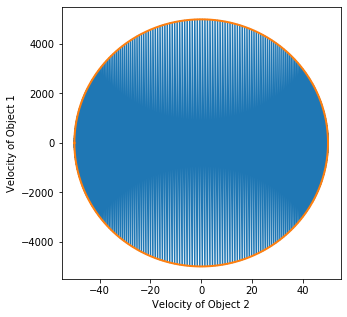

In [9]:
# Initialize variable for digits of pi to calculate
n = 0

# Retrieve digits of pi to calculate from user. Performs input validation by checking for positive numbers (non-integers will break the program)
while n <= 0:
    n = int(input('Enter the number of digits of pi to calculate (recommend < 8): '))

# Calculates pi and returns the result and a log. Parameters are set so execution time is enabled and logging is enabled
result, log = calculate_pi(n, True, True)

# Prints the result
print(f"Result: {result}")

# Plots the data from the log file. Parameter is set so the polygon is visible
plot_results(log, True)